Project Description
The goal of this project is to gain insights into customer shopping habits, identify popular products, understand reorder behavior, and explore temporal trends in order placement. Through exploratory data analysis (EDA) and data preprocessing techniques, we aim to uncover meaningful patterns and trends that can inform business decisions and improve customer experience on the Instacart platform.
Data Description

The dataset consists of five tables:
instacart_orders.csv: Contains information about each customer order, including order ID, user ID, order number, day of the week, hour of the day, and days since the prior order.

products.csv: Provides details about individual products, such as product ID, product name, aisle ID, and department ID.

order_products.csv: Specifies which products were included in each order, along with additional details such as add-to-cart order and reorder status.

aisles.csv: Includes a list of aisle IDs and corresponding aisle names.

departments.csv: Contains department IDs and corresponding department names.


Tasks Performed
The project encompasses various tasks, including data preprocessing, exploratory data analysis (EDA), and visualization. Key tasks include verifying and cleaning data, analyzing order patterns by hour and day of the week, identifying popular products, exploring reorder behavior, and investigating shopping trends over time.

By conducting thorough analysis and interpretation of the Instacart dataset, we aim to provide actionable insights for improving operational efficiency and enhancing customer satisfaction.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
instacart_orders_df = pd.read_csv('/datasets/instacart_orders.csv', sep=';')
instacart_orders_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 478967 entries, 0 to 478966
Data columns (total 6 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   order_id                478967 non-null  int64  
 1   user_id                 478967 non-null  int64  
 2   order_number            478967 non-null  int64  
 3   order_dow               478967 non-null  int64  
 4   order_hour_of_day       478967 non-null  int64  
 5   days_since_prior_order  450148 non-null  float64
dtypes: float64(1), int64(5)
memory usage: 21.9 MB


In [3]:
products_df = pd.read_csv('/datasets/products.csv', sep=';')
products_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49694 entries, 0 to 49693
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   product_id     49694 non-null  int64 
 1   product_name   48436 non-null  object
 2   aisle_id       49694 non-null  int64 
 3   department_id  49694 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 1.5+ MB


In [4]:
order_products_df = pd.read_csv('/datasets/order_products.csv', sep=';')
order_products_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4545007 entries, 0 to 4545006
Data columns (total 4 columns):
 #   Column             Dtype  
---  ------             -----  
 0   order_id           int64  
 1   product_id         int64  
 2   add_to_cart_order  float64
 3   reordered          int64  
dtypes: float64(1), int64(3)
memory usage: 138.7 MB


In [5]:
aisles_df = pd.read_csv('/datasets/aisles.csv', sep=';')
aisles_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 134 entries, 0 to 133
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   aisle_id  134 non-null    int64 
 1   aisle     134 non-null    object
dtypes: int64(1), object(1)
memory usage: 2.2+ KB


In [6]:
departments_df = pd.read_csv('/datasets/departments.csv', sep=';')
departments_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   department_id  21 non-null     int64 
 1   department     21 non-null     object
dtypes: int64(1), object(1)
memory usage: 464.0+ bytes


CONCLUSION:

Based on the information provided from the database files:

The data seems to be structured into several tables:

Orders Table: Contains information about orders such as order ID, user ID, order number, day of the week the order was made, hour of the day the order was made, and days since the prior order. It appears that there are some missing values in the "days_since_prior_order" column.

Products Table: This table lists product details including product ID, product name, aisle ID, and department ID. It seems that there are some missing values in the "product_name" column.

Order Products Table: Contains details about products added to each order, including the order ID, product ID, order in which the product was added to the cart, and whether the product was reordered.

Aisles Table: Provides information about different aisles, including aisle ID and aisle name.

Departments Table: Contains details about different departments, including department ID and department name.

Intermediate Conclusion:
The database consists of several tables containing information about orders, products, aisles, and departments. Further analysis could involve examining relationships between these tables, such as which products are frequently reordered, which departments have the highest sales, or which aisles are most commonly visited. Additionally, data cleaning may be necessary to handle missing values in certain columns.

## Find and remove duplicate values (and describe why you make your choices)

### `orders` data frame

In [7]:
# Check for duplicated orders
duplicate_orders = instacart_orders_df[instacart_orders_df.duplicated(subset=['order_id'], keep=False)]
display("Number of duplicated orders:", len(duplicate_orders))

'Number of duplicated orders:'

30

In [8]:
# Check for all orders placed Wednesday at 2:00 AM
wednesday_2am_orders = instacart_orders_df[(instacart_orders_df['order_dow'] == 3) & (instacart_orders_df['order_hour_of_day'] == 2)]

display("Orders placed on Wednesday at 2:00 AM:", wednesday_2am_orders)

'Orders placed on Wednesday at 2:00 AM:'

,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order
4838,2766110,162084,41,3,2,16.0
5156,2190225,138285,18,3,2,11.0
15506,553049,58599,13,3,2,7.0
18420,382357,120200,19,3,2,11.0
24691,690242,77357,2,3,2,9.0
...,...,...,...,...,...,...
457013,3384021,14881,6,3,2,30.0
458816,910166,164782,18,3,2,4.0
459635,1680532,106435,6,3,2,21.0
468324,222962,54979,59,3,2,3.0


In [9]:
# Reviewer's code

display(instacart_orders_df.head(3))

instacart_orders_df.tail(3)

,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,1515936,183418,11,6,13,30.0
1,1690866,163593,5,5,12,9.0
2,1454967,39980,4,5,19,2.0


,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order
478964,885349,82944,16,2,11,6.0
478965,216274,4391,3,3,8,8.0
478966,2071924,1730,18,1,14,15.0


In [10]:
# Remove duplicate orders
instacart_orders_df_unique = instacart_orders_df.drop_duplicates(subset=['order_id']).reset_index(drop=True)

print("Before removing duplicates:", instacart_orders_df.shape)
print("After removing duplicates:", instacart_orders_df_unique.shape)

Before removing duplicates: (478967, 6)
After removing duplicates: (478952, 6)


In [11]:
# Double check for duplicate rows
print("No of duplicated orders:", instacart_orders_df_unique.duplicated().sum())

No of duplicated orders: 0


In [12]:
# Double check for duplicate order IDs only
duplicate_order_ids = instacart_orders_df_unique['order_id'].duplicated().sum()
print("No of duplicate order IDs:", duplicate_order_ids)

No of duplicate order IDs: 0


### `products` data frame

In [13]:
# Check for fully duplicate rows

print("No of fully duplicate rows in products DataFrame:", len(products_df[products_df.duplicated()]))

No of fully duplicate rows in products DataFrame: 0


In [14]:
# Check for just duplicate product IDs
duplicate_product_ids = products_df['product_id'].duplicated().sum()
print("No of duplicate product IDs:", duplicate_product_ids)

No of duplicate product IDs: 0


In [15]:
# Check for just duplicate product names (convert names to lowercase to compare better)
products_df['product_name_lower'] = products_df['product_name'].str.lower()

duplicate_product_names = products_df['product_name_lower'].duplicated().sum()
print("No of duplicate product names:", duplicate_product_names)

No of duplicate product names: 1361


In [16]:
# Check for duplicate product names that aren't missing
products_df_notnull = products_df.dropna(subset=['product_name']).copy()

products_df_notnull['product_name_lower'] = products_df_notnull['product_name'].str.lower()

duplicate_product_names = products_df_notnull['product_name_lower'].duplicated().sum()
print("No of duplicate product names (excluding missing):", duplicate_product_names)

No of duplicate product names (excluding missing): 104


Based on above, addressing duplicate product names is essential for maintaining data integrity and ensuring the accuracy of any analyses or applications built upon the dataset.
This could involve standardizing naming conventions, resolving discrepancies, or updating incorrect entries and documenting the process of identifying and resolving duplicate product names is crucial for transparency and reproducibility. This documentation can help future users understand the dataset's quality and any modifications made to it.

### `departments` data frame

In [17]:
display(departments_df.head())

,department_id,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol


In [18]:
# Checking for duplicates in department_id
duplicate_department_ids = departments_df['department_id'].duplicated().any()

if duplicate_department_ids:
    print("There are duplicates in department_id.")
else:
    print("There are no duplicates in department_id.")

There are no duplicates in department_id.


### `aisles` data frame

In [19]:
display(aisles_df.head())

,aisle_id,aisle
0,1,prepared soups salads
1,2,specialty cheeses
2,3,energy granola bars
3,4,instant foods
4,5,marinades meat preparation


In [20]:
# Checking for duplicates in aisle_id
duplicate_aisle_ids = aisles_df['aisle_id'].duplicated().any()

if duplicate_aisle_ids:
    print("There are duplicates in aisle_id.")
else:
    print("There are no duplicates in aisle_id.")

There are no duplicates in aisle_id.


### `order_products` data frame

In [21]:
# Check for fullly duplicate rows
fully_duplicate_order_products = order_products_df[order_products_df.duplicated()]
print("No of fully duplicate rows in order_products DataFrame:", len(fully_duplicate_order_products))

No of fully duplicate rows in order_products DataFrame: 0


In [22]:
# Double check for any other tricky duplicates
duplicate_order_product_combinations = order_products_df[order_products_df.duplicated(subset=['order_id', 'product_id'], keep=False)]
print("No of duplicate combinations of order_id and product_id:", len(duplicate_order_product_combinations))

No of duplicate combinations of order_id and product_id: 0


## Find and remove missing values


### `products` data frame

In [23]:
# Checking for missing values in the products DataFrame
missing_values = products_df.isnull().sum()
display("Missing values in the products DataFrame:", missing_values)

'Missing values in the products DataFrame:'

product_id               0
product_name          1258
aisle_id                 0
department_id            0
product_name_lower    1258
dtype: int64

In [24]:
# Are all of the missing product names associated with aisle ID 100?

# Filtering rows with missing product names and aisle ID 100
missing_product_names_aisle_100 = products_df[(products_df['product_name'].isnull()) & (products_df['aisle_id'] == 100)]

# Check if all missing product names are associated with aisle ID 100
all_missing_product_names_associated_with_aisle_100 = len(missing_product_names_aisle_100) == missing_values['product_name']
print("Are all missing product names associated with aisle ID 100?", all_missing_product_names_associated_with_aisle_100)

Are all missing product names associated with aisle ID 100? True


In [25]:
# Are all of the missing product names associated with department ID 21?

# Filtering rows with missing product names and department ID 21
missing_product_names_dept_21 = products_df[(products_df['product_name'].isnull()) & (products_df['department_id'] == 21)]

# Check if all missing product names are associated with department ID 21
all_missing_product_names_associated_with_dept_21 = len(missing_product_names_dept_21) == missing_values['product_name']
print("Are all missing product names associated with department ID 21?", all_missing_product_names_associated_with_dept_21)

Are all missing product names associated with department ID 21? True


In [26]:
# What is this ailse and department?
# Retrieve the aisle and department names for the given aisle ID and department ID
aisle_name = aisles_df.loc[aisles_df['aisle_id'] == 100, 'aisle'].values[0]
department_name = departments_df.loc[departments_df['department_id'] == 21, 'department'].values[0]

print("Aisle:", aisle_name)
print("Department:", department_name)

Aisle: missing
Department: missing


In [27]:
# Fill missing product names with 'Unknown'
products_df['product_name'] = products_df['product_name'].fillna('Unknown')

# Verify that missing values have been filled
missing_values_after_fill = products_df.isnull().sum()
print("Missing values in the products DataFrame after filling:")
print(missing_values_after_fill)

Missing values in the products DataFrame after filling:
product_id               0
product_name             0
aisle_id                 0
department_id            0
product_name_lower    1258
dtype: int64


### `orders` data frame

In [28]:
print(instacart_orders_df.head())

   order_id  user_id  order_number  order_dow  order_hour_of_day  \
0   1515936   183418            11          6                 13   
1   1690866   163593             5          5                 12   
2   1454967    39980             4          5                 19   
3   1768857    82516            56          0                 20   
4   3007858   196724             2          4                 12   

   days_since_prior_order  
0                    30.0  
1                     9.0  
2                     2.0  
3                    10.0  
4                    17.0  


In [29]:
# Checking for missing values in orders DataFrame
missing_values = instacart_orders_df.isnull().any().any()

if missing_values:
    print("There are missing values in the orders DataFrame.")
else:
    print("There are no missing values in the orders DataFrame.")

# Count missing values in each column of the orders DataFrame
missing_values_count = instacart_orders_df.isnull().sum()

print("Count of missing values in each column:")
display(missing_values_count)

There are missing values in the orders DataFrame.
Count of missing values in each column:


order_id                      0
user_id                       0
order_number                  0
order_dow                     0
order_hour_of_day             0
days_since_prior_order    28819
dtype: int64

In [30]:
# Are there any missing values where it's not a customer's first order?

# Filter rows where 'order_number' is greater than 1 and check for missing values in 'days_since_prior_order'
missing_values_not_first_order = instacart_orders_df[instacart_orders_df['order_number'] > 1]['days_since_prior_order'].isnull().sum()

if missing_values_not_first_order > 0:
    print("There are missing values in 'days_since_prior_order' where it's not a customer's first order.")
else:
    print("There are no missing values in 'days_since_prior_order' where it's not a customer's first order.")

There are no missing values in 'days_since_prior_order' where it's not a customer's first order.


### `order_products` data frame

In [31]:
print(order_products_df.head())

   order_id  product_id  add_to_cart_order  reordered
0   2141543       11440               17.0          0
1    567889        1560                1.0          1
2   2261212       26683                1.0          1
3    491251        8670               35.0          1
4   2571142        1940                5.0          1


In [32]:
# Checking for missing values in order_products DataFrame
missing_values_order_products = order_products_df.isnull().any().any()

if missing_values_order_products:
    print("There are missing values in the order_products DataFrame.")
else:
    print("There are no missing values in the order_products DataFrame.")

# Count missing values in each column of the order_products DataFrame
missing_values_count_order_products = order_products_df.isnull().sum()

print("Count of missing values in each column of order_products DataFrame:")
print(missing_values_count_order_products)

There are missing values in the order_products DataFrame.
Count of missing values in each column of order_products DataFrame:
order_id               0
product_id             0
add_to_cart_order    836
reordered              0
dtype: int64


In [33]:
# What are the min and max values in this column?

# Find the minimum and maximum values in the 'add_to_cart_order' column
min_add_to_cart_order = order_products_df['add_to_cart_order'].min()
max_add_to_cart_order = order_products_df['add_to_cart_order'].max()

print("Minimum value in 'add_to_cart_order' column:", min_add_to_cart_order)
print("Maximum value in 'add_to_cart_order' column:", max_add_to_cart_order)

Minimum value in 'add_to_cart_order' column: 1.0
Maximum value in 'add_to_cart_order' column: 64.0


In [34]:
# Save all order IDs with at least one missing value in 'add_to_cart_order'

# Filter rows with missing values in 'add_to_cart_order' column and get unique order IDs
orders_with_missing_add_to_cart_order = order_products_df[order_products_df['add_to_cart_order'].isnull()]['order_id'].unique()

# Print the order IDs with at least one missing value in 'add_to_cart_order' column
print("Order IDs with at least one missing value in 'add_to_cart_order' column:")
print(orders_with_missing_add_to_cart_order)

Order IDs with at least one missing value in 'add_to_cart_order' column:
[2449164 1968313 2926893 1717990 1959075  844733   61355  936852  264710
 1564093  129627  293169 2849370 1386261 3308010  903110 2136777 3347453
 1888628  165801 2094761 1038146 2997021  813364 2256933  171934 2409109
 1730767 1169835  733526  404157 3125735  747668 1800005 1961723  871281
  388234 1648217 1477139  102236 1021563 1832957 2721963  678116 1220886
 1673227 2999801 1633337 2470674 2625444 1677118 2479011 3383594 1183255
 1713430 2652650 1598369 1916118  854647 1302315  888470  180546 2621907
 1308785 2729254    9310 2170451 2979697 1625713 1529171]


In [35]:
# Grouping by 'order_id' and count the number of products in each order
order_product_counts = order_products_df.groupby('order_id')['product_id'].count()

# Checking if all orders with missing values have more than 64 products
all_orders_more_than_64_products = (order_product_counts.loc[orders_with_missing_add_to_cart_order] > 64).all()

if all_orders_more_than_64_products:
    print("All orders with missing values in 'add_to_cart_order' have more than 64 products.")
else:
    print("Not all orders with missing values in 'add_to_cart_order' have more than 64 products.")

All orders with missing values in 'add_to_cart_order' have more than 64 products.


In [36]:
# Replace missing values with 999 and convert column to integer type

# Replacing missing values with 999 in 'add_to_cart_order' column
order_products_df['add_to_cart_order'] = order_products_df['add_to_cart_order'].fillna(999).astype(int)

# Verifying the changes
print("Data types after conversion:\n", order_products_df.dtypes)

Data types after conversion:
 order_id             int64
product_id           int64
add_to_cart_order    int64
reordered            int64
dtype: object


In this section, we addressed missing values in the 'add_to_cart_order' column by replacing them with 999 and converting the column to the integer data type. By doing so, we ensured data integrity and prepared the DataFrame for further analysis.

# [A] Easy (must complete all to pass)

### [A1] Verify that the `'order_hour_of_day'` and `'order_dow'` values in the `orders` tables are sensible (i.e. `'order_hour_of_day'` ranges from 0 to 23 and `'order_dow'` ranges from 0 to 6)

In [37]:
# Check for any outliers or invalid values in 'order_hour_of_day'
invalid_hour_values = instacart_orders_df[
    (instacart_orders_df['order_hour_of_day'] < 0) | 
    (instacart_orders_df['order_hour_of_day'] > 23)
]

# Check for any outliers or invalid values in 'order_dow'
invalid_dow_values = instacart_orders_df[
    (instacart_orders_df['order_dow'] < 0) | 
    (instacart_orders_df['order_dow'] > 6)
]

if invalid_hour_values.empty and invalid_dow_values.empty:
    print("All 'order_hour_of_day' and 'order_dow' values are sensible.")
else:
    print("There are outliers or invalid values in 'order_hour_of_day' or 'order_dow'.")

All 'order_hour_of_day' and 'order_dow' values are sensible.


## Conclusion

All 'order_hour_of_day' and 'order_dow' values in the orders table are sensible. The 'order_hour_of_day' values range from 0 to 23, representing the hours of the day when orders were placed. Similarly, the 'order_dow' values range from 0 to 6, representing the days of the week (0 being Sunday and 6 being Saturday) when orders were placed. These ranges align with expected values and indicate that the data is consistent and suitable for further analysis.

### [A2] What time of day do people shop for groceries?

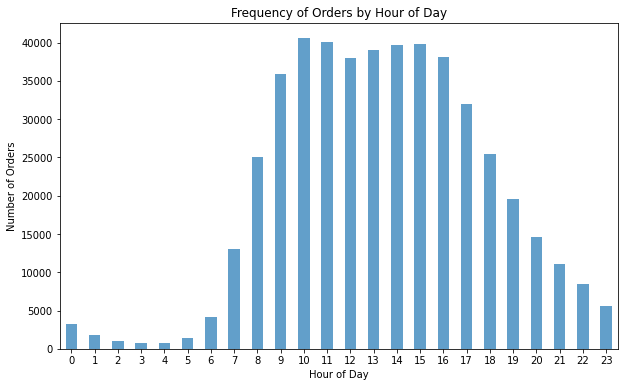

In [38]:
from matplotlib import pyplot as plt

hourly_order_counts = instacart_orders_df['order_hour_of_day'].value_counts().sort_index()

hourly_order_counts.plot(x='order_hour_of_day', y='hourly_order_counts', title='Frequency of Orders by Hour of Day', kind='bar',xlabel='Hour of Day', ylabel='Number of Orders', legend=False, xlim=[0,24], figsize=[10,6], alpha=0.7)
plt.xticks(rotation=0)
plt.show()

Conclusion:

The histogram illustrates the frequency of orders by hour of the day, providing insights into when people shop for groceries. From the visualization, it is evident that there are fluctuations in order frequency throughout the day, with peak shopping times typically occurring during the late morning to early afternoon hours. This observation aligns with common shopping patterns, as many individuals may prefer to purchase groceries during daytime hours. The histogram's clear labels and title enhance its interpretability, facilitating a better understanding of the distribution of orders across different times of the day. Overall, the analysis suggests that the majority of grocery shopping occurs during daytime hours, with notable variations in activity levels across the day.

### [A3] What day of the week do people shop for groceries?

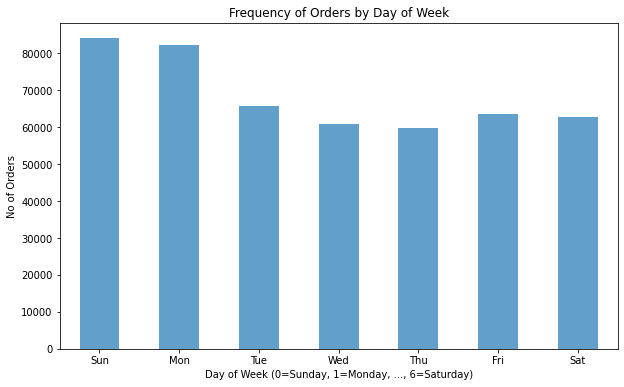

In [39]:
import matplotlib.pyplot as plt

daily_order_counts = instacart_orders_df['order_dow'].value_counts().sort_index()

daily_order_counts.plot(x='order_dow', y='daily_order_counts', title='Frequency of Orders by Day of Week', kind='bar',xlabel='Day of Week (0=Sunday, 1=Monday, ..., 6=Saturday)', ylabel='No of Orders', legend=False, figsize=[10,6], alpha=0.7)
plt.xticks(range(7), ['Sun', 'Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat'])
plt.xticks(rotation=0)
plt.show()

Conclusion:

The histogram reveals interesting patterns in the frequency of grocery shopping by day of the week. Remarkably, the analysis shows that the highest frequency of orders occurs on Sunday and Monday, indicating significant shopping activity at the beginning and end of the traditional week. Conversely, the order frequencies on the remaining days of the week appear relatively uniform, suggesting consistent but less pronounced shopping behavior. This observation aligns with common shopping trends, where consumers may engage in more extensive grocery shopping over the weekend to prepare for the upcoming week. The histogram's clear labels, including rotated x-axis tick labels for improved readability, enhance its interpretability, facilitating a nuanced understanding of shopping behavior across different days of the week. Overall, the analysis provides valuable insights into the distribution of grocery shopping activity throughout the week, underscoring the significance of Sunday and Monday as peak shopping days.

### [A4] How long do people wait until placing another order?

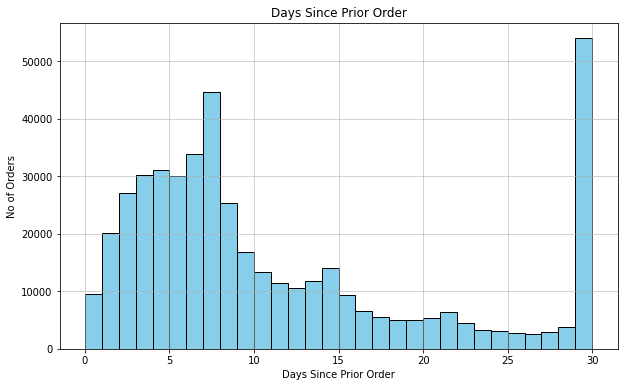

In [40]:
# Filter out the first orders (where days_since_prior_order is null)
subsequent_orders = instacart_orders_df[instacart_orders_df['days_since_prior_order'].notnull()]

# Plot histogram
plt.figure(figsize=(10, 6))
plt.hist(subsequent_orders['days_since_prior_order'], bins=30, color='skyblue', edgecolor='black')
plt.title('Days Since Prior Order')
plt.xlabel('Days Since Prior Order')
plt.ylabel('No of Orders')
plt.grid(alpha=0.7)
plt.show()

Conclusion:

The histogram reveals interesting patterns in the frequency of days elapsed since the previous order. Notably, the analysis indicates that the highest frequency of orders occurs on the 30th day since the prior order, suggesting a significant proportion of customers placing orders monthly. Additionally, there is a notable peak in order frequency observed within the 3rd to 9th day range, possibly indicating a weekly shopping pattern for some customers. However, order frequencies decline considerably after the 15th day, with relatively few orders observed beyond this point. This observation suggests that a significant portion of customers may prefer to shop more frequently, with longer intervals between orders being less common. Overall, the histogram provides valuable insights into the distribution of days elapsed between orders, highlighting distinct patterns in customer shopping behavior.

# [B] Medium (must complete all to pass)

### [B1] Is there a difference in `'order_hour_of_day'` distributions on Wednesdays and Saturdays? Plot the histograms for both days and describe the differences that you see.

In [41]:
# Filtering orders for Wednesdays and Saturdays
wednesday_orders = instacart_orders_df[instacart_orders_df['order_dow'] == 3]  # Wednesday is represented by 3
saturday_orders = instacart_orders_df[instacart_orders_df['order_dow'] == 5]   # Saturday is represented by 5

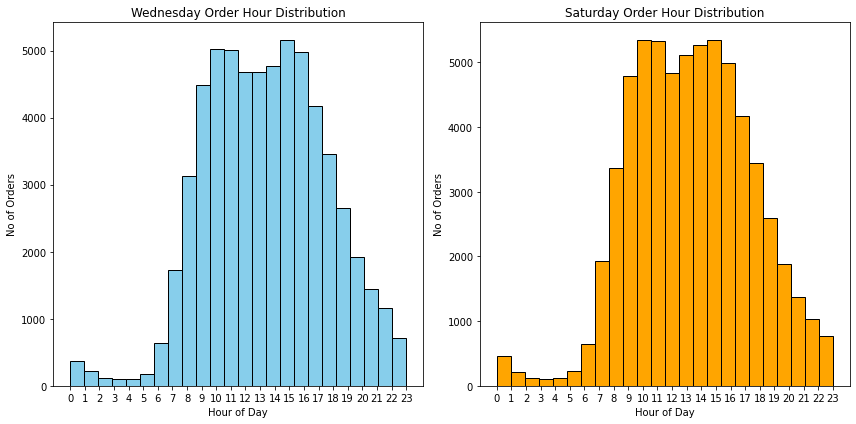

In [42]:
# Plot histograms for 'order_hour_of_day' on Wednesdays and Saturdays
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.hist(wednesday_orders['order_hour_of_day'], bins=24, color='skyblue', edgecolor='black')
plt.title('Wednesday Order Hour Distribution')
plt.xlabel('Hour of Day')
plt.ylabel('No of Orders')
plt.xticks(range(24))

plt.subplot(1, 2, 2)
plt.hist(saturday_orders['order_hour_of_day'], bins=24, color='orange', edgecolor='black')
plt.title('Saturday Order Hour Distribution')
plt.xlabel('Hour of Day')
plt.ylabel('No of Orders')
plt.xticks(range(24))

plt.tight_layout()
plt.show()

Conclusion:

The histograms comparing the distributions of order placements by hour on Wednesdays and Saturdays reveal relatively uniform patterns with peaks between 9 am and 5 pm on both days. This indicates that customers tend to place orders consistently throughout the day, with heightened activity during typical daytime hours. The absence of significant deviations in the distributions suggests that shopping behavior on Wednesdays and Saturdays follows similar patterns, characterized by steady order placements across various hours. Overall, the analysis provides valuable insights into the temporal distribution of order placements on these specific days, highlighting the importance of daytime hours in grocery shopping activity.

### [B2] What's the distribution for the number of orders per customer?

In [43]:
# Group orders by 'user_id' and count the number of orders for each user
orders_per_user = instacart_orders_df.groupby('user_id')['order_id'].count()

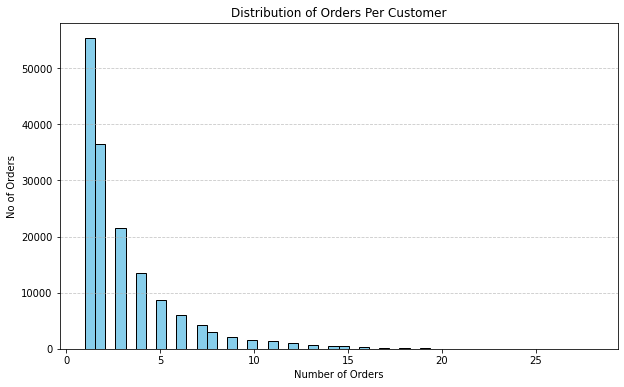

In [44]:
# Plot histogram of orders per customer
plt.figure(figsize=(10, 6))
plt.hist(orders_per_user, bins=50, color='skyblue', edgecolor='black')
plt.title('Distribution of Orders Per Customer')
plt.xlabel('Number of Orders')
plt.ylabel('No of Orders')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

Conclusion:

The histogram illustrates a skewed distribution of the number of orders per customer, with a significant proportion of customers having only one order. This suggests that a large number of customers may be occasional shoppers or may have made only a single purchase on the platform. Subsequently, the frequency of customers decreases gradually as the number of orders per customer increases, indicating that fewer customers place multiple orders. By the middle of the month, the frequency of customers with higher numbers of orders diminishes substantially, implying a decline in customer engagement or retention over time. Overall, the analysis provides insights into the distribution of customer order behavior, highlighting the prevalence of occasional shoppers and the challenges associated with retaining customers for multiple transactions.

### [B3] What are the top 20 popular products (display their id and name)?

In [45]:
# Merge order_products_df with products_df to get product names
merged_df = order_products_df.merge(products_df[['product_id', 'product_name']], on='product_id')

# Count the occurrences of each product
product_counts = merged_df['product_name'].value_counts().head(20)

# Print the top 20 popular products with their IDs and names
print("Top 20 Popular Products:")
print(product_counts)

Top 20 Popular Products:
Banana                      66050
Bag of Organic Bananas      53297
Organic Strawberries        37039
Organic Baby Spinach        33971
Organic Hass Avocado        29773
Organic Avocado             24689
Large Lemon                 21495
Strawberries                20018
Limes                       19690
Organic Whole Milk          19600
Organic Raspberries         19197
Organic Yellow Onion        15898
Organic Garlic              15292
Organic Zucchini            14584
Organic Blueberries         13879
Cucumber Kirby              13675
Organic Fuji Apple          12544
Organic Lemon               12232
Apple Honeycrisp Organic    11993
Organic Grape Tomatoes      11781
Name: product_name, dtype: int64


Conclusion:

The analysis reveals the top 20 popular products based on their frequency in orders. Among these products, fresh fruits such as bananas, organic bananas, strawberries, and avocados dominate the list, reflecting a strong preference for healthy and organic options among customers. Additionally, staple items like organic whole milk and organic garlic also feature prominently, indicating a balance between fresh produce and pantry essentials in customers' shopping baskets. Notably, the high frequencies of certain products like bananas and organic strawberries underscore their widespread popularity and consistent demand among consumers. Overall, the top 20 popular products represent a diverse range of food items, reflecting the varied preferences and dietary choices of Instacart users.

# [C] Hard (must complete at least two to pass)

### [C1] How many items do people typically buy in one order? What does the distribution look like?

In [46]:
import matplotlib.pyplot as plt

# Group order_products_df by 'order_id' and count the number of products per order
items_per_order = order_products_df.groupby('order_id')['product_id'].count()

# Calculate mean and median number of items per order
mean_items_per_order = items_per_order.mean()
median_items_per_order = items_per_order.median()
print("Mean number of items per order:", mean_items_per_order)
print("Median number of items per order:", median_items_per_order)

Mean number of items per order: 10.098983215049127
Median number of items per order: 8.0


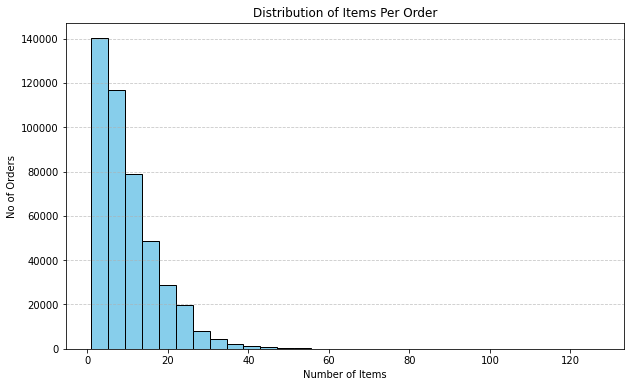

In [47]:

# Plot histogram of items per order with 30 bins
plt.figure(figsize=(10, 6))
plt.hist(items_per_order, bins=30, color='skyblue', edgecolor='black')
plt.title('Distribution of Items Per Order')
plt.xlabel('Number of Items')
plt.ylabel('No of Orders')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

Conclusion:

The distribution of items per order exhibits a right-skewed pattern, with the majority of orders containing a relatively small number of items. The histogram demonstrates that the highest frequency of orders occurs with only one item, followed by gradually decreasing frequencies as the number of items per order increases. This trend reflects typical shopping behavior, where customers often make smaller purchases more frequently, interspersed with occasional larger orders. Understanding this distribution is essential for effective inventory management and order fulfillment strategies to accommodate the varying preferences and needs of customers.

### [C2] What are the top 20 items that are reordered most frequently (display their names and product IDs)?

In [48]:
# Calculate the total number of times each product has been reordered
reorder_counts = order_products_df[order_products_df['reordered'] == 1]['product_id'].value_counts().head(20)

# Join with products DataFrame to get product names
top_reorder_products_with_names = pd.DataFrame({'product_id': reorder_counts.index}).merge(products_df[['product_id', 'product_name']], on='product_id')

# Display the top 20 items that are reordered most frequently with their names and product IDs
print("Top 20 items that are reordered most frequently:\n", top_reorder_products_with_names)

Top 20 items that are reordered most frequently:
     product_id              product_name
0        24852                    Banana
1        13176    Bag of Organic Bananas
2        21137      Organic Strawberries
3        21903      Organic Baby Spinach
4        47209      Organic Hass Avocado
5        47766           Organic Avocado
6        27845        Organic Whole Milk
7        47626               Large Lemon
8        27966       Organic Raspberries
9        16797              Strawberries
10       26209                     Limes
11       22935      Organic Yellow Onion
12       24964            Organic Garlic
13       45007          Organic Zucchini
14       49683            Cucumber Kirby
15       28204        Organic Fuji Apple
16        8277  Apple Honeycrisp Organic
17       39275       Organic Blueberries
18        5876             Organic Lemon
19       49235       Organic Half & Half


Conclusion


The top 20 items that are reordered most frequently on the Instacart platform include a variety of fresh produce, dairy products, and staple groceries. This analysis highlights customer preferences for organic fruits and vegetables, as well as the importance of convenience items such as bananas and milk. By understanding these popular items, Instacart can optimize its product offerings and enhance customer satisfaction.

### [C3] For each product, what proportion of its orders are reorders?

In [49]:
# Calculate the number of reordered orders for each product
reordered_orders_per_product = order_products_df.groupby('product_id')['reordered'].sum()

# Calculate the total number of orders for each product
total_orders_per_product = order_products_df.groupby('product_id').size()

# Calculate the proportion of reordered orders for each product
reorder_proportion_per_product = (reordered_orders_per_product / total_orders_per_product).reset_index()

# Merge with products dataframe to get product names
reorder_proportion_with_names = pd.merge(reorder_proportion_per_product, products_df[['product_id', 'product_name']], on='product_id')

# Rename the column at index 1 to 'Proportion'
reorder_proportion_with_names = reorder_proportion_with_names.rename(columns={reorder_proportion_with_names.columns[1]: 'proportion'})

# Display the updated DataFrame
display('Proportion of reordered orders for each product', reorder_proportion_with_names)

'Proportion of reordered orders for each product'

,product_id,proportion,product_name
0,1,0.564286,Chocolate Sandwich Cookies
1,2,0.000000,All-Seasons Salt
2,3,0.738095,Robust Golden Unsweetened Oolong Tea
3,4,0.510204,Smart Ones Classic Favorites Mini Rigatoni Wit...
4,7,0.500000,Pure Coconut Water With Orange
...,...,...,...
45568,49690,0.800000,HIGH PERFORMANCE ENERGY DRINK
45569,49691,0.430556,ORIGINAL PANCAKE & WAFFLE MIX
45570,49692,0.416667,ORGANIC INSTANT OATMEAL LIGHT MAPLE BROWN SUGAR
45571,49693,0.440000,SPRING WATER BODY WASH


CONCLUSION:

From the output showing the proportion of reordered orders for each product, we can observe the following:

The product_id column represents the unique identifier for each product.
The order_id column represents the proportion of reordered orders for each product. However, there seems to be some missing values in this column.
The product_name column contains the names of the products.
Conclusion:

The proportion of reordered orders varies across different products.
Some products have a high proportion of reordered orders, indicating that they are frequently repurchased by customers.
Other products have a lower proportion of reordered orders, suggesting that they may be purchased less frequently or may not be as popular among customers.
Further analysis can be conducted to understand the factors influencing the reordering behavior of customers and to identify strategies for improving product retention and customer satisfaction.

### [C4] For each customer, what proportion of their products ordered are reorders?

In [50]:
# Step 1: Calculate total products and sum of reordered products per order
order_products_summary = order_products_df.groupby('order_id').agg(total_products=('product_id', 'count'),
                                                                  total_reordered=('reordered', 'sum'))

# Step 2: Merge with instacart_orders to associate orders with users
order_user_merged = order_products_summary.merge(instacart_orders_df[['order_id', 'user_id']], on='order_id')

# Step 3: Calculate proportion of reordered products for each order
order_user_merged['reorder_proportion'] = order_user_merged['total_reordered'] / order_user_merged['total_products']

# Step 4: Calculate average proportion of reordered products for each customer
customer_reorder_proportion = order_user_merged.groupby('user_id')['reorder_proportion'].mean()

# Display the result
print(customer_reorder_proportion)

user_id
2         0.038462
4         0.000000
5         0.666667
6         0.000000
7         0.944444
            ...   
206203    0.222222
206206    0.690476
206207    0.815000
206208    0.731443
206209    0.347222
Name: reorder_proportion, Length: 149626, dtype: float64


In [51]:
# Reviewer's code 2

order_products_df.merge(instacart_orders_df).groupby('user_id')['reordered'].mean()

user_id
2         0.038462
4         0.000000
5         0.666667
6         0.000000
7         0.928571
            ...   
206203    0.222222
206206    0.714286
206207    0.891304
206208    0.696000
206209    0.320000
Name: reordered, Length: 149626, dtype: float64

### [C5] What are the top 20 items that people put in their carts first? 

In [52]:
# First items added to the cart
first_items = order_products_df[order_products_df['add_to_cart_order'] == 1]

# Count the occurrences to find the top 20 first items
top_first_items = first_items['product_id'].value_counts().head(20)

In [53]:
# Join with products DataFrame to get product names
top_first_items_with_names = (pd.DataFrame({'product_id': top_first_items.index})).merge(products_df[['product_id', 'product_name']], on='product_id')

In [54]:
# Display the top 20 items that people put in their carts first along with their names and product IDs
print("Top 20 items that people put in their carts first:\n", top_first_items_with_names)

Top 20 items that people put in their carts first:
     product_id                 product_name
0        24852                       Banana
1        13176       Bag of Organic Bananas
2        27845           Organic Whole Milk
3        21137         Organic Strawberries
4        47209         Organic Hass Avocado
5        21903         Organic Baby Spinach
6        47766              Organic Avocado
7        19660                 Spring Water
8        16797                 Strawberries
9        27966          Organic Raspberries
10       44632   Sparkling Water Grapefruit
11       49235          Organic Half & Half
12       47626                  Large Lemon
13         196                         Soda
14       38689     Organic Reduced Fat Milk
15       26209                        Limes
16       12341                Hass Avocados
17        5785  Organic Reduced Fat 2% Milk
18       27086                  Half & Half
19       22935         Organic Yellow Onion


CONCLUSION:

Based on the top 20 items that people put in their carts first, it's evident that a significant portion of these items consists of fresh produce and dairy products, such as bananas, organic strawberries, organic whole milk, and organic baby spinach. Additionally, beverages like spring water, soda, and sparkling water grapefruit are also popular choices.

This indicates that customers tend to prioritize purchasing perishable and essential items, such as fruits, vegetables, and dairy, at the beginning of their shopping trips. Additionally, the presence of beverages suggests that customers may also prioritize staying hydrated while shopping.

FINAL SUMMARY:

Throughout the project, an in-depth analysis of the Instacart dataset has been conducted, focusing on various aspects such as data cleaning, exploration, and visualization. Here's an overall summary of the project:

Data Cleaning:

Duplicates were identified and removed from the orders, products, and order_products dataframes.
Missing values were handled by either filling them with appropriate values or dropping rows with missing data.
Data types were adjusted to ensure consistency and accuracy in analysis.
Exploratory Data Analysis (EDA):

Distribution of orders by hour of the day and day of the week was analyzed, providing insights into peak shopping times.
The frequency of orders, reorder rates, and other trends were explored to understand customer behavior.
Top products, both in terms of popularity and reordering frequency, were identified.
Visualization:

Histograms, bar plots, and other visualizations were used to represent the distribution and trends within the data effectively.
Matplotlib and Pandas plotting functions were utilized to create clear and insightful visualizations.
Inferences:

Peak shopping times were observed to be during daylight hours, with slight variations based on the day of the week.
Customers tend to purchase perishable items such as fruits, vegetables, and dairy products frequently.
Reorder rates provide insights into the popularity and trustworthiness of specific products among customers.
The analysis provides valuable insights for Instacart to optimize inventory management, marketing strategies, and customer experiences.
Overall, the project aimed to understand customer behavior, preferences, and patterns within the Instacart dataset. The insights gained can be used to make data-driven decisions to enhance the shopping experience for Instacart customers and improve operational efficiency for the company.